# Unsupervised Learning

In supervised learning, each observation in the training set is an $(\mathbf{x}, y)$ tuple, consisting of a input vector $\mathbf{x}$ and an output label $y$. The goal is to learn a function $h(\mathbf{x})$ that approximates this relationship. This function should accurately predict the output label of an useen observation. If the labels form a set of discrete values or classes, the problem is called classification. If the labels are continuous, it is a regression problem.

Another type of problem consists of only feature vectors, without labels. There are many scenarios where a labelled dataset cannot be obtained for which this approach is appropriate.

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import numpy as np
import sklearn.datasets
import math
import random
%matplotlib inline

def new_plot():
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1,1,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')
    return fig, ax

## Normalisation

Unupervised learning algorithms draw upon the similarity of elements in the training set to form predictions. The *distance metric* is an important part of doing so. In multidimensional problems, the magnitude of different attributes can differ significantly, effectively weighting the proximity in the dimension which has the largest average value more heavily. Attributes should be normalised to presereve any existing relationship, but scaling the underlying values to lie within a certain range.

In [8]:
def min_max_normalise_feature(x_min, x_max, x_i):
    return (x_i-x_min)/(x_max-x_min)
def z_score_standardise_feature(x_mean, x_std, x_i):
    return (x_i-x_mean)/x_std

The same dataset without normailisation, using min/max normalisation and using z-score normalisation.

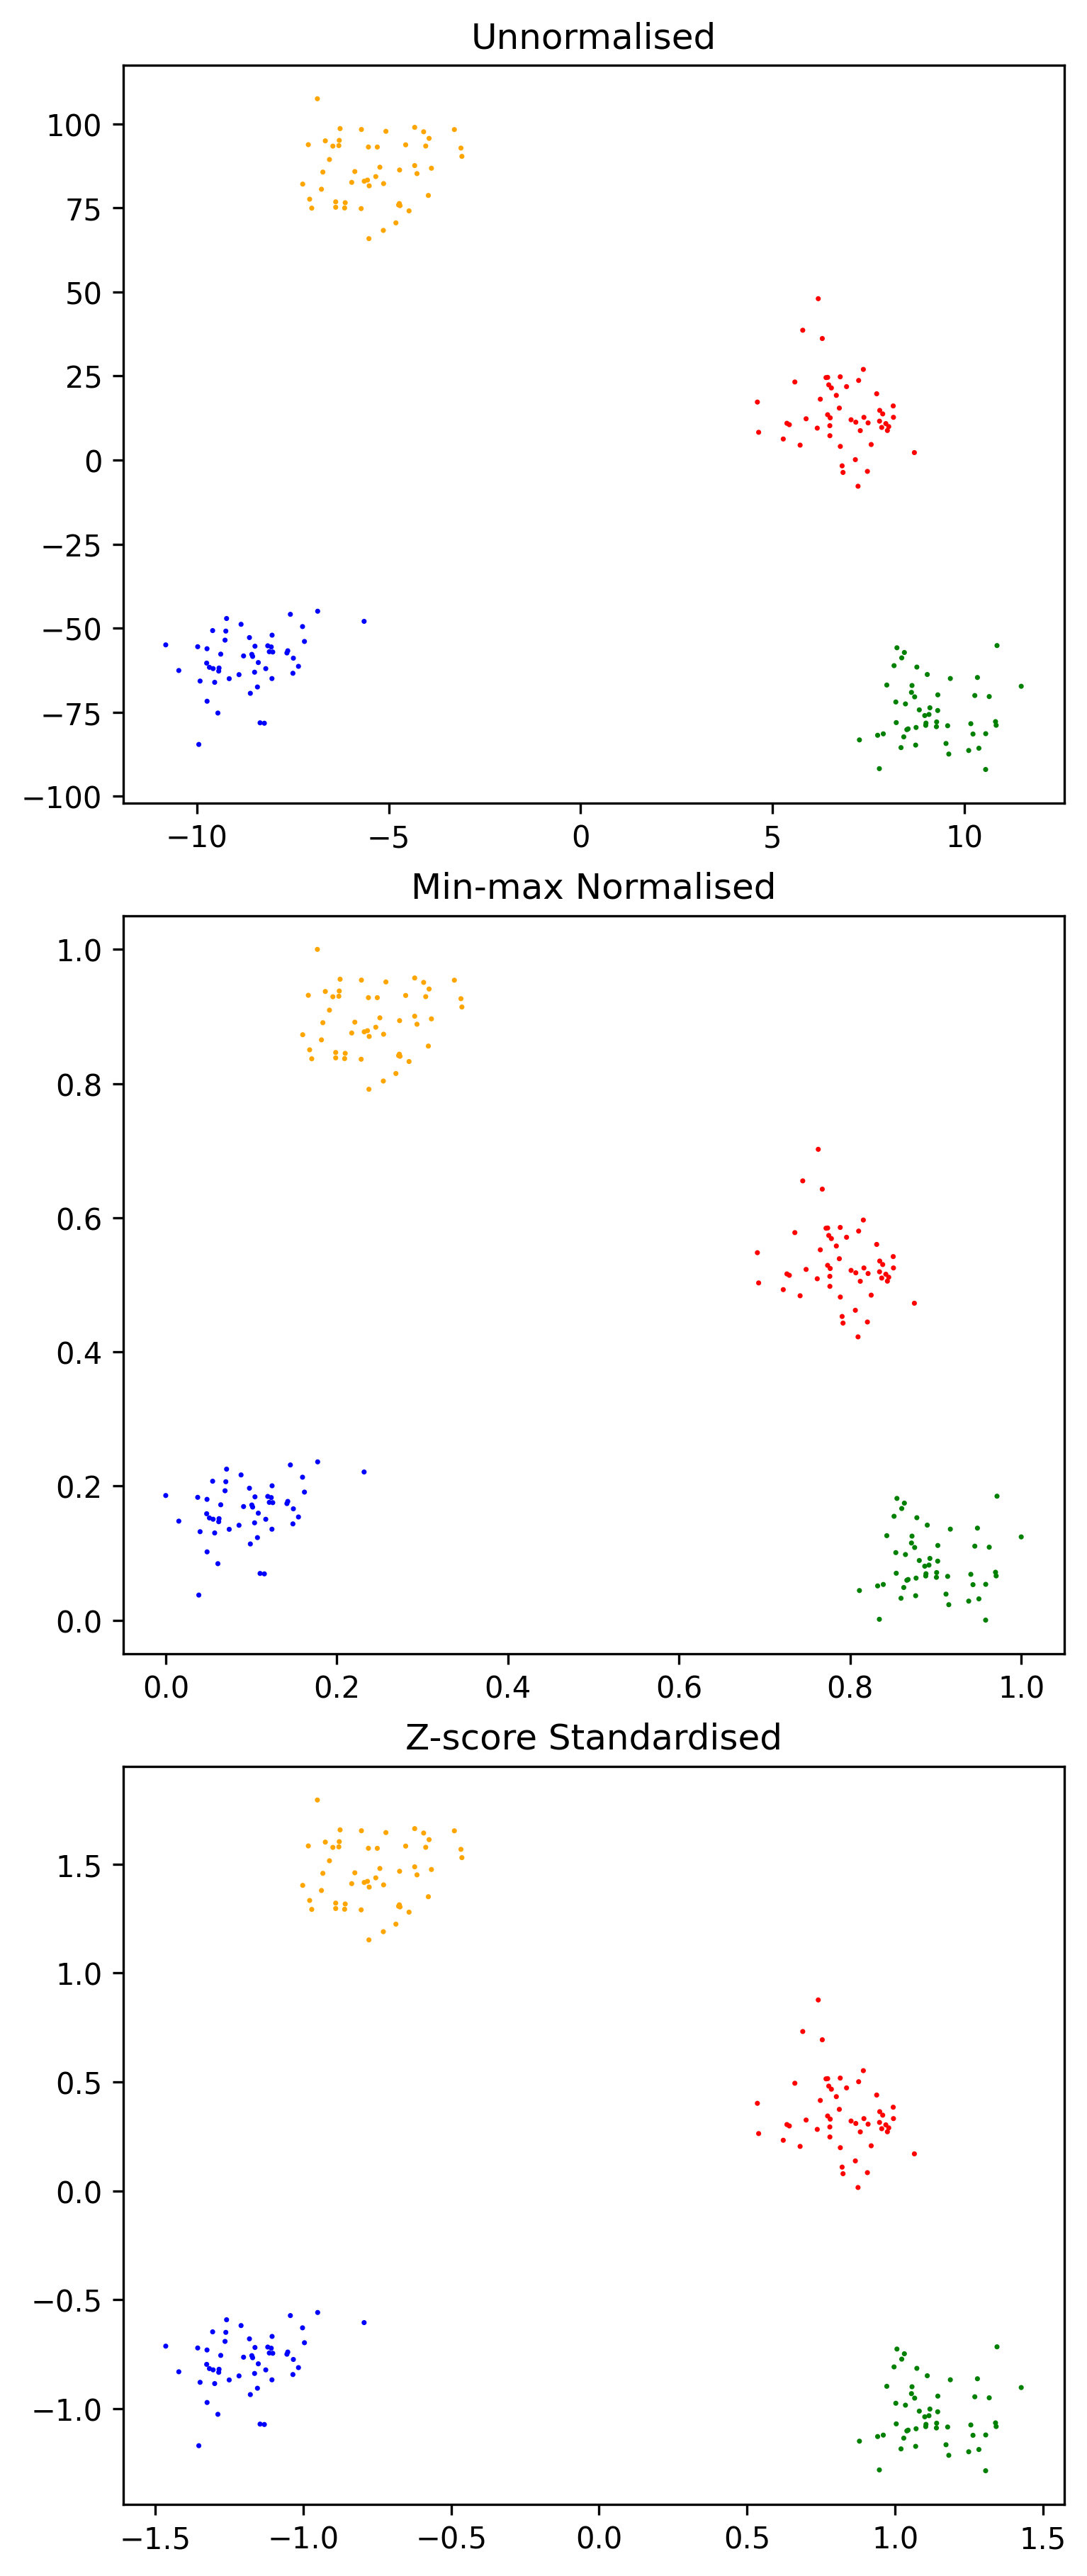

In [12]:
fig = plt.figure(dpi=300, layout="constrained", figsize=(5,12))

colors = ["blue", "red", "green", "orange"]
X, y= sklearn.datasets.make_blobs(n_features=2, centers=4, n_samples=200)
# X, y = sklearn.datasets.make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_classes=4, n_clusters_per_class=1)
X = np.stack((X[:,0], X[:,1]*10), axis=-1)

ax = fig.add_subplot(3,1,1)
ax.set_title("Unnormalised")
ax.scatter(X[:, 0], X[:, 1], marker=".", c=y, s=2, cmap=mpl.colors.ListedColormap(colors))

ax = fig.add_subplot(3,1,2)
ax.set_title("Min-max Normalised")
ax.scatter(min_max_normalise_feature(np.min(X[:, 0]), np.max(X[:, 0]), X[:, 0]), min_max_normalise_feature(np.min(X[:, 1]), np.max(X[:, 1]), X[:, 1]), marker=".", c=y, s=2, cmap=mpl.colors.ListedColormap(colors))

ax = fig.add_subplot(3,1,3)
ax.set_title("Z-score Standardised")
ax.scatter(z_score_standardise_feature(np.mean(X[:, 0]), np.std(X[:, 0]), X[:, 0]), z_score_standardise_feature(np.mean(X[:, 1]), np.std(X[:, 1]), X[:, 1]), marker=".", c=y, s=2, cmap=mpl.colors.ListedColormap(colors))




## Minowski distance

If $X$ and $Y$ are vectors of size $n$, the Minowski distance is defined as:

$$D(X,Y) = (\sum_i^n|x_i-y_i|^p)^{\frac{1}{p}}$$

If $p$ is 1 the result is the Manhattan distance. If $p$ is 2 the result is the Euclidean distance. As $p \rightarrow \infty$, $D(X,Y)$ is the Chebyshev distance. This is a useful distance metric.

In [16]:
def D(X,Y,p):
    return sum([abs(X[i] - Y[i])**p for i in range(len(X))])**(1/p)

For all distance functions, the distance from one point to another is positive; the distance function is symmetric; the distance from a point to itself is always 0 and the distance from one point to another is always less than or equal to the distance between them via a third (triangular).

## Partitional Clustering

Assigns $N$ observations into $K < N$ clusters, maximising *intra-cluster similarity* and minimising *inter-cluster* similarity.

- $\mathbf{C}$ is a structure of $K$ clusters.
- $C \in \mathbf{C}$ is one of $K$ clusters.
- $e \in C$ is one observation within a cluster.
- $n_C$ is the number of examples in cluster C.
- $c_k \in C_k$ is the centroid of the $k$th cluster.

*Variability* or *inertia* of a cluster:

$$variability(C) = \sum_{e \in C}d(e, centroid(C))$$

The *centroid* of a cluster is the average position of every element in the cluster. $d$ is some distance function, often the square of the euclidean distance.

Minimising the *dissimilarity* of the cluster structure is an optimisation problem. This is sometimes called the *within cluster sum of squares* (WCSS). Maximising the *between cluster sum of squares*.

$$dissimilarity(\mathbf{C}) = \sum_{C \in \mathbf{C}}variability(C)$$
$$\text{WCSS}(\mathbf{C}) = \sum_{C \in \mathbf{C}}\sum_{e \in C} d_{Euc}(e, centroid(C))^2$$

### K-Means

K-Means is a greedy iterative descent algorithm for minimising dissimilarity.

Given a number of clusters $K$ and $N$ observations:

1. Select $K$ observations as centroids.
2. Repeat:
    1. Assign each observation to the cluster of the nearest centroid.
    2. Calculte the new centroid position for each cluster.

In [17]:
def nearest_centroid(c_k, x):
    centroid_distances = [D(x, c_k[i], 2)**2 for i in range(len(c_k))]
    return centroid_distances.index(min(centroid_distances))
    

def k_means(c_k, X):
    C = [[] for _ in range(len(c_k))]
    for i in range(len(X)):
        centroid_distances = [D(X[i], c_k[j], 2)**2 for j in range(len(c_k))]
        # print(centroid_distances)
        C[centroid_distances.index(min(centroid_distances))].append(X[i])
    # return C
    return np.array([[np.mean(np.array(C[i])[:,j]) for j in range(len(X[0]))] for i in range(len(c_k))])

In [34]:
colors = ["blue", "red", "orange", "green", "purple"]
X, y= sklearn.datasets.make_blobs(n_features=2, centers=5, n_samples=500)
X = np.stack((min_max_normalise_feature(np.min(X[:, 0]), np.max(X[:, 0]), X[:,0]), min_max_normalise_feature(np.min(X[:, 1]), np.max(X[:, 1]), X[:,1])), axis=-1)
c_k = np.array([X[random.randint(0,500)] for _ in range(5)])

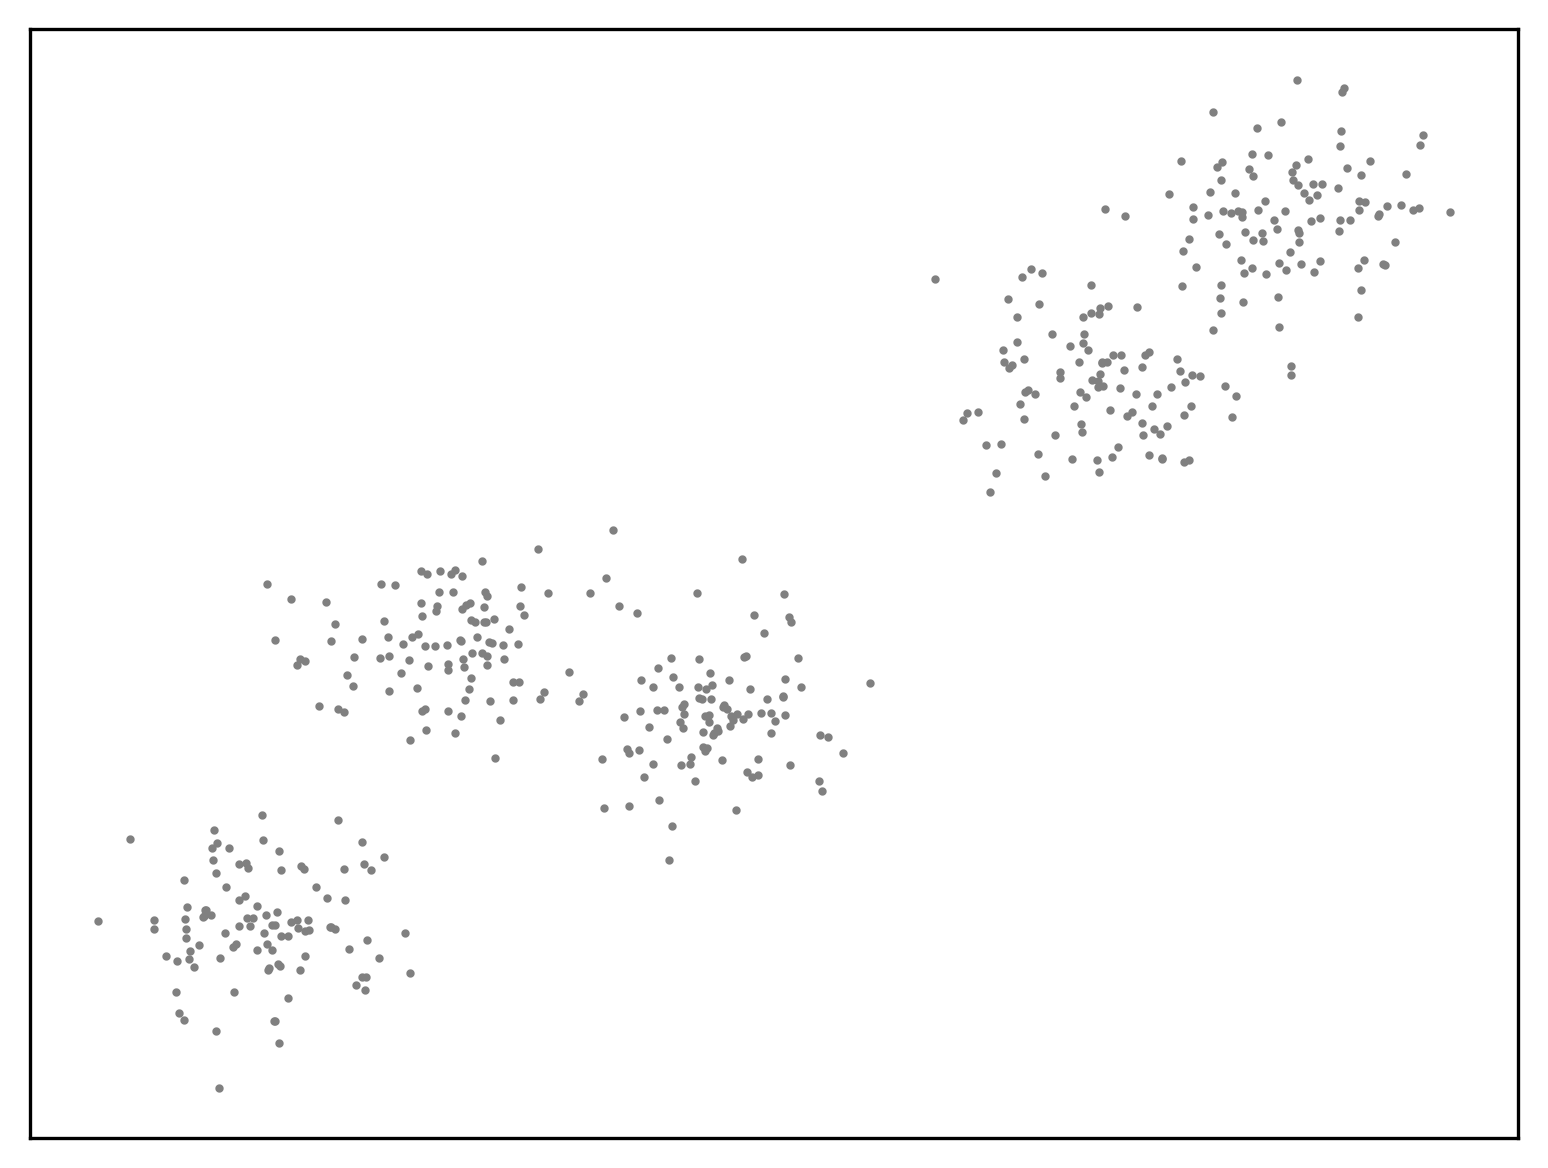

In [36]:
fig, ax = new_plot()
ax.scatter(X[:,0], X[:,1], s=1, c='grey')

def animate_k_means(frame):
    global c_k
    global ax
    ax.clear()
    ax.set_xticks([])
    ax.set_yticks([])
    if frame == 0:
        ax.scatter(X[:,0], X[:,1], s=1, c='grey')
    elif frame == 1:
        ax.scatter(X[:,0], X[:,1], s=1, c='grey')
        ax.scatter(c_k[:,0], c_k[:,1], c=[i for i in range(5)], s=10, marker='s', edgecolors="black", cmap=mpl.colors.ListedColormap(colors))
    elif frame == 2:
        ax.scatter(X[:,0], X[:,1], s=1, c=[nearest_centroid(c_k, x) for x in X], cmap=mpl.colors.ListedColormap(colors))
        ax.scatter(c_k[:,0], c_k[:,1], c=[i for i in range(5)], s=10, marker='s', edgecolors="black", cmap=mpl.colors.ListedColormap(colors))
    else:
        c_k = k_means(c_k, X)
        ax.scatter(X[:,0], X[:,1], s=1, c=[nearest_centroid(c_k, x) for x in X], cmap=mpl.colors.ListedColormap(colors))
        ax.scatter(c_k[:,0], c_k[:,1], c=[i for i in range(5)], s=10, marker='s', edgecolors="black", cmap=mpl.colors.ListedColormap(colors))

anim = animation.FuncAnimation(fig=fig, func=animate_k_means, frames=9, interval=1000)
anim.save('../animations/k_means.gif')